<a href="https://colab.research.google.com/github/omicsEye/PUBH6859/blob/main/assignment5_Haegi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Haegi Oh

# **Linear Regression Analysis: What is the relationship between Age and Cancer Diagnosis?**

About input data:


*   from University of California Irvine's Machine Learning Public Repository: https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29
*   dataset focuses on the prediction of indicators/diagnosis of cervical cancer. The features cover demographic information, habits, and historic medical records
* The dataset was collected at 'Hospital Universitario de Caracas' in Caracas, Venezuela
* Several patients decided not to answer some of the questions because of privacy concerns (missing values)
* More information can be found about column attributes in link above







In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Inspecting Data**

In [ ]:
# Load data as pandas DataFrame and inspect data

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/cervical_cancer.txt", sep=",")

df

# df.head()
# df.tail()

# View entire table:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#     print(df)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [ ]:
# See which variables have a correlation. 

df.corr()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Age,1.000000,-0.001606,0.110340,0.061443,0.101722,0.092635,-0.003967,0.103283,-0.016862,0.055956
STDs: Number of diagnosis,-0.001606,1.000000,-0.015423,0.008070,-0.015423,-0.002289,0.076787,0.130873,0.055114,0.097449
Dx:Cancer,0.110340,-0.015423,1.000000,-0.015072,0.886508,0.665647,0.134264,0.157812,0.113446,0.160905
Dx:CIN,0.061443,0.008070,-0.015072,1.000000,-0.015072,0.606939,-0.021233,0.009119,-0.023938,0.113172
Dx:HPV,0.101722,-0.015423,0.886508,-0.015072,1.000000,0.616327,0.134264,0.157812,0.113446,0.160905
Dx,0.092635,-0.002289,0.665647,0.606939,0.616327,1.000000,0.072215,0.098952,0.088740,0.157607
Hinselmann,-0.003967,0.076787,0.134264,-0.021233,0.134264,0.072215,1.000000,0.650249,0.192467,0.547417
Schiller,0.103283,0.130873,0.157812,0.009119,0.157812,0.098952,0.650249,1.000000,0.361486,0.733204
Citology,-0.016862,0.055114,0.113446,-0.023938,0.113446,0.088740,0.192467,0.361486,1.000000,0.327466
Biopsy,0.055956,0.097449,0.160905,0.113172,0.160905,0.157607,0.547417,0.733204,0.327466,1.000000


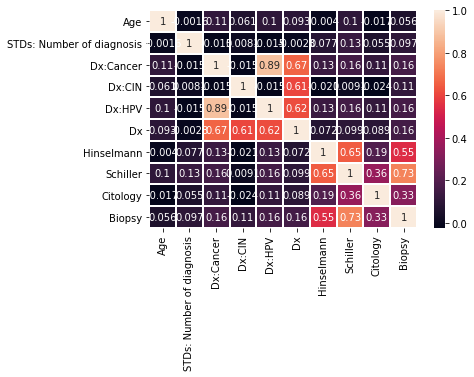

In [ ]:
# Inspecting all correlations

sns.heatmap(df.corr(),annot=True,lw=1)

In [ ]:
# Select certain columns. In this assignment, we will be analyzing the relationship between Age and Dx Cancer (Cancer Diagnosis)

df1 = df[['Age','Dx:Cancer']]

# Rename column labels for clarity

df1 = df1.rename(columns=str).rename(columns={'Dx:Cancer':'Cancer Diagnosis'})

df1

,Age,Cancer Diagnosis
0,18,0
1,15,0
2,34,0
3,52,1
4,46,0
...,...,...
853,34,0
854,32,0
855,25,0
856,33,0


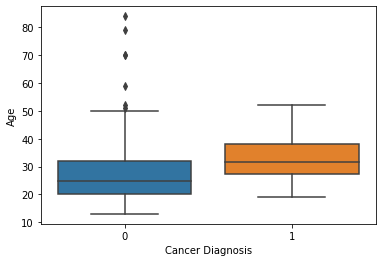

In [ ]:
# Inspecting correlations between Age and Cancer Diagnosis

sns.boxplot(y='Age',x='Cancer Diagnosis',data=df1)

In [ ]:
# Inspecting correlations by exact number

crosstable=pd.crosstab(df1['Age'],df1['Cancer Diagnosis'])
crosstable

Cancer Diagnosis,0,1
Age,,
13,1,0
14,5,0
15,21,0
16,23,0
17,35,0
18,50,0
19,43,1
20,45,0
21,45,1


# **Performing Linear Regression**

In [ ]:
# Setting up independent and dependent variables

X = df1['Age']
Y = df1['Cancer Diagnosis']

print(X, Y)

0      18
1      15
2      34
3      52
4      46
       ..
853    34
854    32
855    25
856    33
857    29
Name: Age, Length: 858, dtype: int64 0      0
1      0
2      0
3      1
4      0
      ..
853    0
854    0
855    0
856    0
857    0
Name: Cancer Diagnosis, Length: 858, dtype: int64


In [ ]:
# Create training and testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Reshape to fit Linear Regression Model

X_train1 = X_train.values.reshape(-1,1)
y_train1 = y_train.values.reshape(-1,1)
X_test1 = X_test.values.reshape(-1,1)
y_test1 = y_test.values.reshape(-1,1)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(514, 1)
(344, 1)
(514, 1)
(344, 1)


In [ ]:
# Import Linear Regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# print the intercept
print(model.intercept_)

[-0.04084053]


In [ ]:
# Convert series to DataFrame

A = X.to_frame()

# Caculate correlation coefficient
# A positive sign indicates that as the predictor variable increases, the Target variable also increases

coeff_parameter = pd.DataFrame(model.coef_,A.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Age,0.002326


In [ ]:
# Create predictions

predictions = model.predict(X_test1)

# View predictions. I left it commented out since the output is very long
# predictions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


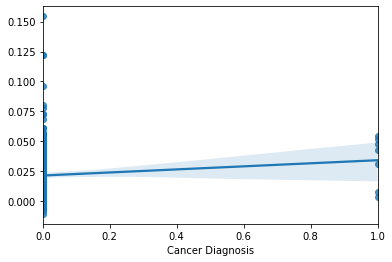

In [ ]:
# Plot Linear Regression

sns.regplot(y_test,predictions)

In [ ]:
# Caculate R-squared value

import statsmodels.api as sm

X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:       Cancer Diagnosis   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     8.728
Date:                Wed, 21 Apr 2021   Prob (F-statistic):            0.00328
Time:                        15:23:15   Log-Likelihood:                 268.56
No. Observations:                 514   AIC:                            -533.1
Df Residuals:                     512   BIC:                            -524.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0408      0.022     -1.856      0.0

# **Conclusion**

From inspecting the dataset, we can see that Age and Cancer Diagnosis have some correlation. However, when we run the Linear Regression Algorithm, we have a very small positive correlation coefficient (0.002326). This positive relationship can be viewed from our Linear Regression plot. However, our plot is not very clear, therefore our model may not be producing the best results.

Our R-squared value = 0.017, which is very small. So, our model does not explain any variation in the response variable around its mean. 

Therefore from our analysis, we can loosely conclude that as Age increases Cancer Diagnosis increases as well - to some extent.
